# Grupo Bimbo Inventory Demand

Notebook con la implementación del modelo para [esta](https://www.kaggle.com/c/grupo-bimbo-inventory-demand) competencia en kaggle.


### Ideas principales

* Ocupar redes neuronales con la librería tensorflow.
* Ocupar procesos guassianos con librería por seleccionar.

### Archivos

* train.csv — the training set
* test.csv — the test set
* sample_submission.csv — a sample submission file in the correct format
* cliente_tabla.csv — client names (can be joined with train/test on Cliente_ID)
* producto_tabla.csv — product names (can be joined with train/test on Producto_ID)
* town_state.csv — town and state (can be joined with train/test on Agencia_ID)


### Features

* Semana — Week number (From Thursday to Wednesday)
* Agencia_ID — Sales Depot ID
* Canal_ID — Sales Channel ID
* Ruta_SAK — Route ID (Several routes = Sales Depot)
* Cliente_ID — Client ID
* NombreCliente — Client name
* Producto_ID — Product ID
* NombreProducto — Product Name
* Venta_uni_hoy — Sales unit this week (integer)
* Venta_hoy — Sales this week (unit: pesos)
* Dev_uni_proxima — Returns unit next week (integer)
* Dev_proxima — Returns next week (unit: pesos)
* Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)

# Usando tensorflow

Primero importamos las librerías necesarias

In [1]:
%matplotlib inline
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

Generamos una función para leer los datos. Retorna un ndarray con los datos.

In [2]:
# fileName: Name of the csv file.
# rows: Number of rows to be read.
# header: Number of rows to be skipped from the beginning of the file.
def readData(fileName, rows, header):
    # We use genfromtxt to read the data and return it like a numpy array
    my_data = genfromtxt(fileName, delimiter=',',skip_header=header, max_rows=rows)
    return my_data

In [3]:
train_data = readData('Archivos/train.csv', 500000, 0)

print('train_data ', train_data.shape)

train_data  (500000, 11)


Inspeccionemos los datos primero antes de generar cualquier modelo.  
Nuestro valor objetivo es la última columna de nuestros datos: *Demanda_uni_equil*, veamos como se distribuye sobre los datos que hemos tomado.

In [4]:
# Recieves an array of elements and plot its histogram
# array: Values
# maxValue: Max value to be shown in the histogram
def toHist(array, maxValue):
    plt.hist(array[array<maxValue], bins=200, color='blue')
    plt.show()

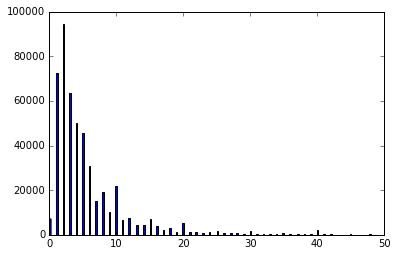

In [5]:
demanda_uni_equil = train_data[:,10]
toHist(demanda_uni_equil, 50)

In [9]:
#Al parecer pandas anda muchísimo mejor leyendo los datos.
import pandas as pd

In [10]:
timing = pd.read_csv('Archivos/train.csv', usecols=['Semana','Demanda_uni_equil'])
print('Size: ' + str(timing.shape))

Size: (74180464, 2)


In [14]:
print(timing.get_value(0, 'Semana'))

3
